### SPARKS TASKS

**AUTHOR : DHARSHINI M**

#### PREDICITION USING DECISION TREE CLASSIFIER ( LEVEL INTERMEDIATE)

#### DATASET => IRIS DATASET

In [153]:
## IMPORTING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [181]:
## READING THE DATA:

data=pd.read_csv("iris.csv")

In [182]:
## To view the data
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [183]:
data=data.drop(['Id'],axis=1)

In [184]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [185]:
## To know the shape of the data:

data.shape

(150, 5)

##### There 150 rows and 5 columns in the dataset

In [186]:
## To know the datatypes of the columns :

data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [187]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [188]:
##### The target variable is object variable..So we need to convert it to Numerical variable.

data=data.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})

<AxesSubplot:>

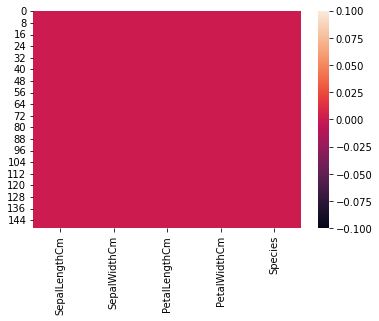

In [189]:
### TO CHECK WHETHER OUR DATA CONTAINS NULL VALUES ARE NOT...

sns.heatmap(data.isnull())

In [163]:
### There is no "Null Values" in the dataset.

In [164]:
### To check for the outliers in the dataset

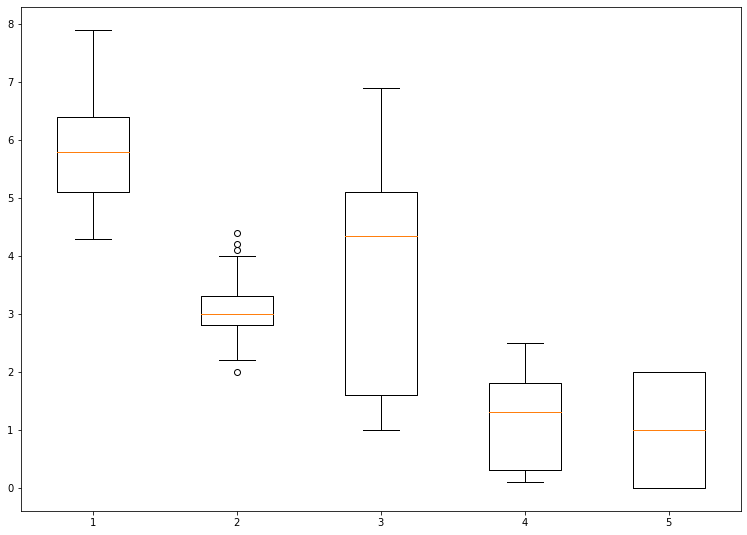

In [190]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

##### There is some outliers in the dataset

###### INORDER TO PREDICT THE TARGET VARIABLE , LETS DO A SIMPLE CORRELEATION TO SEE IF THE VARIABLES HAVE RELATION WITH THE TARGET VARIABLE . WE CAN REMOVE THE SEPAL WIDTH CM ATTRIBUTE TO HAVE A BETTER ACCURACY.

In [166]:
corr_result=data.corr()

<AxesSubplot:>

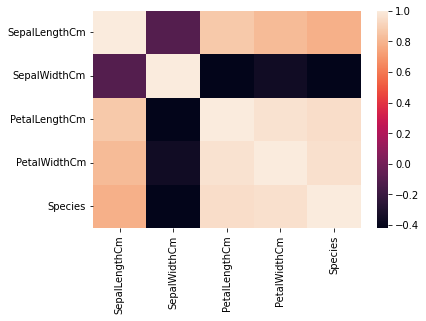

In [167]:
## Now for better understanding , lets visualize correlation results using heatmap
sns.heatmap(corr_result)

##### Except the SepalWidthCm all other variables has good correlation with the target variable.

In [168]:
## lets remove that variable

data=data.drop(['SepalWidthCm'],axis=1)


In [169]:
## SEPERATING THE DATA INTO INDEPENDANT VARIABLES

X=data.drop(['Species'],axis=1)
Y=data['Species']


In [170]:
X.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [171]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [172]:
## TO SPLIT THE DATA INTO TRAIN AND TEST:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

### DECISION TREE CLASSIFIER:

In [173]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [177]:
### applying cross validation for testing data.
from sklearn.model_selection import cross_val_score

max_depth=[1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    dtc_1=dtc= DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=val)
    dtc_1.fit(x_train,y_train)
    accuracy_cross_val=cross_val_score(dtc_1,x_test,y_test,scoring='accuracy',cv=5)
    print(f'Average score({val}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(1): 0.764
Average score(2): 0.896
Average score(3): 0.846
Average score(4): 0.846
Average score(5): 0.846
Average score(6): 0.846
Average score(7): 0.846
Average score(8): 0.846
Average score(9): 0.846
Average score(10): 0.846


### So for the max_depth of "2" the model yields good accuracy than other max_depth values.

In [179]:
dtc_1=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=2)
dtc_1.fit(x_train,y_train)
accuracy_cross_val=cross_val_score(dtc_1,x_test,y_test,scoring='accuracy',cv=5)
print(f'Average score({2}): {"{:.3f}".format(accuracy_cross_val.mean())}')

Average score(2): 0.896


##### visualizing the tree:

[Text(133.92000000000002, 181.2, 'X[1] <= -0.807\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

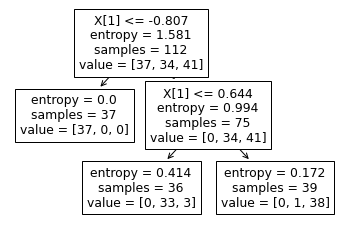

In [180]:
from sklearn import tree
tree.plot_tree(dtc_1)